# 10 Different Clustering Algorithms

Cluster analysis is a method to group set of objects so they are in the same group, called  cluster. In general the objects who are more similar to eachther are in one cluster. We recognize different types of clustering and in this excericse I will try to present and explain 10 of them.

In [2]:
#import libraries
#NOTE: for different clustering algoriths I will append libraries before startign the cifferent clustering process
import numpy as np #mathematical operations
import matplotlib.pyplot as plt # plotting library
import warnings # ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pandas import read_csv #read the file with pandas
file = 'Avocado.csv'

In [3]:
#read the file and present first 3 rows
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [4]:
#select desired data and its values and transform in matrix = NxM, N being 2 with data x and y and M is the len(x_col.values).
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[x_col].values
c_map = 'Small Bags'
data_s = data_raw[[x_col, y_col]].values
data_c = data_raw[c_map].values

Text(0.5, 1.0, 'Random dependacy')

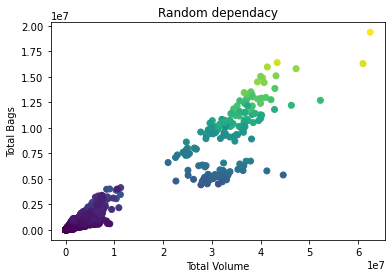

In [18]:
#plot data, so we get the general view of it. 
plt.scatter(data_s[:,0],data_s[:,1], c = data_c , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')

## Define number of Clusters

We need to define the number of clusters. We do this with the elbow method and as we see from the graph below, the appropriate number of clusters is 3. With the different data we get different clusters, so I highly recommend to use algorithum below and determine the optimal number of your cluster value. There are different methods to define the optimal number of clusters. For newcomers I suggest this one, since it's the most simple with a for loop and can be easily performed. 

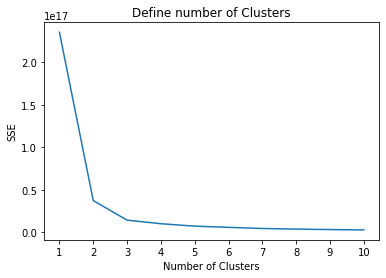

In [21]:
# A list holds the SSE values for each k
points = data_s #rename the data you wanna work with for a more consistant use
from sklearn.cluster import KMeans
cluster = []
for k in range(1, 11):
    #different range of clusters to try
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(points)
    cluster.append(kmeans.inertia_)
#plot the data    
plt.plot(range(1, 11), cluster)
plt.xticks(range(1, 11))
plt.title('Define number of Clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## K Mean Clustering

K-mean clustering is a method of vector quanization. It's based on observations that divide in to clusterin which each obsercation belongs to a certain cluster who has the nearest mean. It is calculated with squared Euclidean distance. 

[0 1 2]


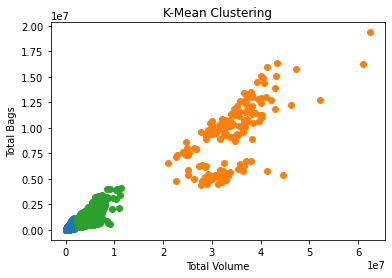

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
y_km = kmeans.fit_predict(points)
clusters = np.unique(y_km)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_km == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('K-Mean Clustering')

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram_p = points[0:25]

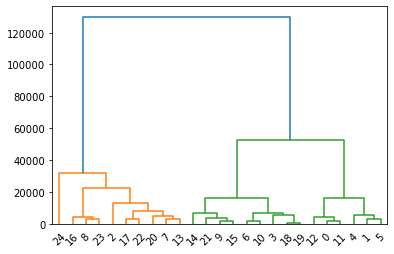

In [23]:
dendrogram = sch.dendrogram(sch.linkage(dendrogram_p, method='ward'))

## Affinity Propagation
Affinnity propagation which is based on "message passing" between points. The biggest difference for a newcomer is that this algorithm does not require number of clusters, since affinity find the "clusters"(acalled exemplars" on its own. 

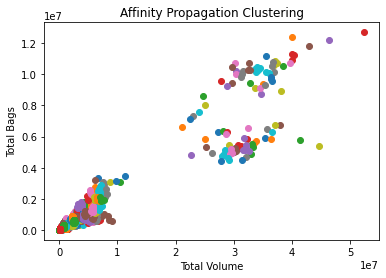

In [67]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
ap = points[0:(int(len(points)/3))] # if we take all points, the model doesn't find any clusters so we reduce the data
#to 1/3 of the points
model.fit(ap)
# assign a cluster to each example
yhat = model.predict(ap)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(ap[row_ix, 0], ap[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Affinity Propagation Clustering')

## Agglomerative Clustering

Agglomerative Clustering performs a hierarchinal clustering with bottom up approachs. That meas that each observation starts in its ovn cluster.

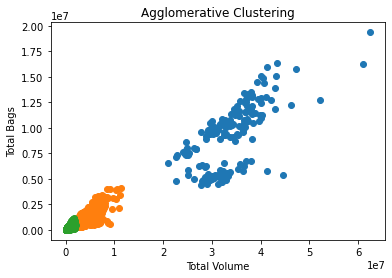

In [68]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(points)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Agglomerative Clustering')

## Birch Clustering

Birch clusstering builds a CFT (Clustering feature Tree) for the data we used. In generally the data is compressed. Important thing to note is that Birch does not scale very well to high dimensionaly data. But if we get high dimensional data we can use Mini Batch K means, since its a similar algorithm.

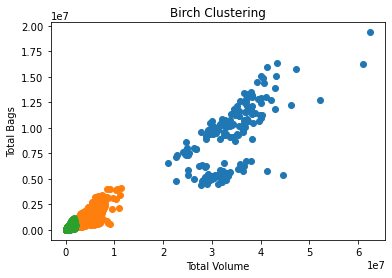

In [70]:
# birch clustering
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.5, n_clusters=3)
# fit the model
model.fit(points)
# assign a cluster to each example
yhat = model.predict(points)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Birch Clustering')

## DBSCAN

DBSCAN or Density-based spatial clustering of applications with noise works of groups points together that and the groupind is based on distance measurment (Euclidea distance). You set minimum number of points. Interestingly it also marks outliers that are in the low density regions. As we see below it doesn't work well for your data, since it does not return any clusters, even with the lowest number of samples. 

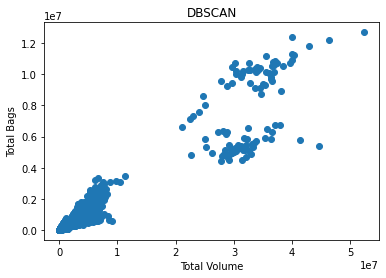

In [82]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.1, min_samples=2)
yhat = model.fit_predict(ap)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(ap[row_ix, 0], ap[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('DBSCAN')

## Mini-Batch K-Means

This method is just a variant of the K means, but it uses mini-batched to reduce progress time. We get slightly different results. In general Mini-Batch progresses faster than K-means but the quality of the result in reduced. 

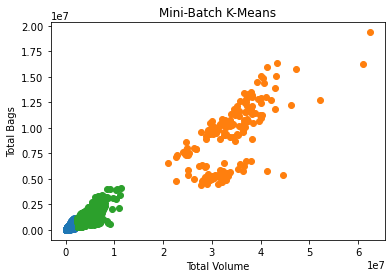

In [87]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=3)
# fit the model
model.fit(points)
# assign a cluster to each example
yhat = model.predict(points)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Mini-Batch K-Means')

## Mean Shift

This algorith aims to discover blobs in a smooth density of samples. It works by updating candidates for centroids to be mean of the points within a given region. Algorithm also sets the number of clusters. But you can decide on the estimated regions with bandwidth parameter. As we see Mean Shift doesn't find any clusters. 

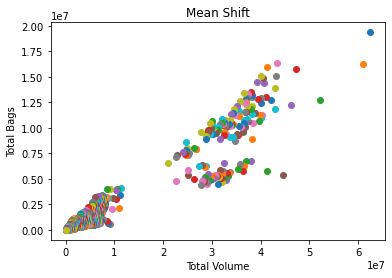

In [91]:
# mean shift clustering
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth = 3.0)
# fit model and predict clusters
yhat = model.fit_predict(points)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Mean Shift')

## Optics

Optics shares many things with DBSCAN. I won't go in to details why are they different. But Optics algorith builds a reachability graph, which assings sample a reachability distance and a spot withing the cluster. As we see Optics doesn't find clusters well, as well as DBSCAN

<Figure size 432x288 with 0 Axes>

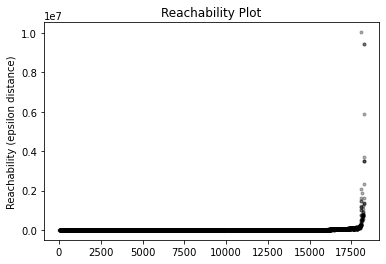

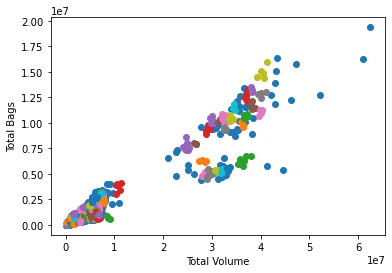

In [102]:
from sklearn.cluster import OPTICS,cluster_optics_dbscan
model = OPTICS(eps=0.3, min_samples=3)
# fit model and predict clusters
yhat = model.fit_predict(points)
# retrieve unique clusters
clusters = unique(yhat)
plt.figure()
labels_050 = cluster_optics_dbscan(reachability=model.reachability_,
                                   core_distances=model.core_distances_,
                                   ordering=model.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=model.reachability_,
                                   core_distances=model.core_distances_,
                                   ordering=model.ordering_, eps=2)
space = np.arange(len(points))
reachability = model.reachability_[model.ordering_]
labels = model.labels_[model.ordering_]
plt.figure()
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')

# create scatter plot for samples from each cluster
plt.figure()
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)

## Spectral Clustering

Spectral clustering performs a low-dimension embedding of the affinity matrix between samples, followed by clustering by KMeans. It works well for small number of clusters but is not advisedfor many clusteres. As we see from the graph, the clustering method does not perform well on this dataset.

C:\Users\vivia\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


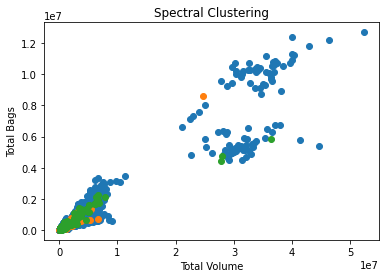

In [107]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
#we use ap dataset, because if we use all of the points we don't see any clusters. 
yhat = model.fit_predict(ap)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(ap[row_ix, 0], ap[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Spectral Clustering')

## Gaussian Mixture Class

Gausian Mixture model is a model that assumes all the data points are generated from a micture of a finite number of Gaussian distrubtions. and Implentes expectation maximization alghorith. As we see it doesnt work well here. 

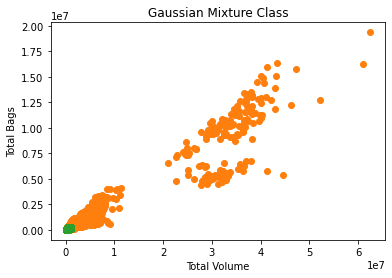

In [114]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
# fit the model
model.fit(points)
# assign a cluster to each example
yhat = model.predict(points)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(points[row_ix, 0], points[row_ix, 1])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Gaussian Mixture Class')


# Conclusion

As we see from this excercise, not all methods are appropriate for all data sets and for all purposes. Here only K means, Bitch and Agglomerative Clusterings present a somewhat satisfactory result. Defenitly data could be improved and manipulated for better results. But the points here was to show different Algorithms from sklearn package. Hope you enjoyed. 